In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# Notebook parameters
data_name = 'readpapers_up2.csv'
data_path = '../data/'
data_file = ''.join(data_path + data_name)


In [86]:
# Utility Functions
def split(word):
    return [char for char in word]

def get_wcloud(df):
  stopwords = set(STOPWORDS)
  words = ''
  for document in df.abstract:
    val = str(document).lower()
    tokens = val.split()
    words += " ".join(tokens)+" "
  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(words)
  return wordcloud

def plot_4_wclouds(df, l1, l2, l3, l4):
    l1 = str(l1).upper()
    l2 = str(l2).upper()
    l3 = str(l3).upper()
    l4 = str(l4).upper()

    wc_1 = get_wcloud(df[df['jel_dummy_' + l1] == 1])
    wc_2 = get_wcloud(df[df['jel_dummy_' + l2] == 1])
    wc_3 = get_wcloud(df[df['jel_dummy_' + l3] == 1])
    wc_4 = get_wcloud(df[df['jel_dummy_' + l4] == 1])
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,20))
    ax1.imshow(wc_1)
    ax1.axis('off')
    ax1.set_title('JEL Code:' + l1)
    ax2.imshow(wc_2)
    ax2.axis('off')
    ax2.set_title('JEL Code:' + l2)
    ax3.imshow(wc_3)
    ax3.axis('off')
    ax3.set_title('JEL Code:' + l3)
    ax4.imshow(wc_4)
    ax4.axis('off')
    ax4.set_title('JEL Code:' + l4)

def get_top_n_words(corpus, n=20):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_top_words(df, column_name, letter, n=20):
    letter = str(letter).upper()
    common_words = get_top_n_words(df[df['jel_dummy_'+ letter] == 1][column_name], n)
    df2 = pd.DataFrame(common_words, columns = ['abstract' , 'count'])
    df2.groupby('abstract').sum()['count'].sort_values(ascending=False).iplot(
      kind='bar', yTitle='Count', linecolor='black', title=f'Top {n} words in review after removing stop words in JEL Code: {letter}')

def Accuracy(y_true, y_pred):
    temp = 0
    for i in range(y_true.shape[0]):
        temp += sum(np.logical_and(y_true[i], y_pred[i])) / sum(np.logical_or(y_true[i], y_pred[i]))
    return temp / y_true.shape[0]

In [13]:
data = pd.read_csv(data_file)

print(data.shape)

(4988, 71)


In [15]:
print(data.columns)
data.head()

Index(['Column1', 'title_x', 'idpaper_2', 'journal', 'journal_num', 'year',
       'month', 'volume', 'issue', 'idpaper', 'jelcodes', 'keywords',
       'abstract', 'start_page', 'end_page', 'num_words', 'num_words_90_flag',
       'idauthor', 'author', 'prop_women', 'num_authors', 'gender_group_type',
       'sole_or_coauthors', 'num_pages', 'num_pages_dmean',
       'flesch_kincaid_grade_level', 'log_flesch_kincaid_grade_level',
       'flesch_kincaid_reading_ease', 'log_flesch_kincaid_reading_ease',
       'dale_chall', 'log_dale_chall', 'coleman_liau_index',
       'log_coleman_liau_index', 'automated_readability_index',
       'log_automated_readability_index', 'american_economic_review',
       'econometrica', 'journal_of_pol_economy',
       'quarterly_journal_of_economics', 'review_of_economic_studies',
       'coauthors', 'single_author', 'both_genders', 'only_females',
       'only_males', 'num_sentences', 'num_syllables', 'observation',
       'authors', 'jelcodes_letter', '

Column1                                            title_x      idpaper_2  \
0        0     optimal adoption of complementary technologies   120009011529   
1        1  collateral damage: effects of the japanese ban...   120009013045   
2        2  endogenous inequality in integrated labor mark...   120009014672   
3        3  labor-market integration, investment in risky ...   120009017395   
4        4  unequal societies: income distribution and the...  1200090196129   

                    journal  journal_num  year  month  volume  issue  \
0  American Economic Review            1  2000  March      90      1   
1  American Economic Review            1  2000  March      90      1   
2  American Economic Review            1  2000  March      90      1   
3  American Economic Review            1  2000  March      90      1   
4  American Economic Review            1  2000  March      90      1   

        idpaper  ... jel_dummy_K jel_dummy_L jel_dummy_M  jel_dummy_N  \
0  1.200090e+09  ...           0           0           0            0   
1  1.200090e+09  ...           0           0           0            0   
2  1.200090e+09  ...           0           0           0            0   
3  1.200090e+09  ...           0           0           0            0   
4  1.200090e+09  ...           0           0           0            0   

   jel_dummy_O  jel_dummy_P  jel_dummy_Q jel_dummy_R jel_dummy_Y  jel_dummy_Z  
0            1            0            0           0           0            0  
1            0            0            0           0           0            0  
2            0            0            0           0           0            0  
3            0            0            0           1           0            0  
4            0            1            0           0           0            0  

[5 rows x 71 columns]

In [17]:
data.drop(columns=['Column1'], inplace=True)


In [32]:
df = data[-data['jelcodes_letter'].isnull()]
df_woLetter = data[data['jelcodes_letter'].isnull()]

print('Data with identified letter', df.shape)
print('Data without identified letter', df_woLetter.shape)

Data with identified letter (3126, 71)
Data without identified letter (1862, 71)


In [38]:
df['tags'] = df['jelcodes_letter'].apply(lambda word: split(word))

<ipython-input-38-448a2caedbb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['jelcodes_letter'].apply(lambda word: split(word))


In [36]:
all_tags = [item for sublist in list(df['jelcodes_letter'].apply(lambda word: split(word)).values) for item in sublist]

tags_counted_and_sorted = pd.DataFrame({'tag': all_tags}).groupby('tag').size().reset_index().sort_values(0, ascending=False)
tags_counted_and_sorted.head()

tag     0
3    D  1525
4    E   694
9    J   668
2    C   663
11   L   581

<AxesSubplot:ylabel='tag'>

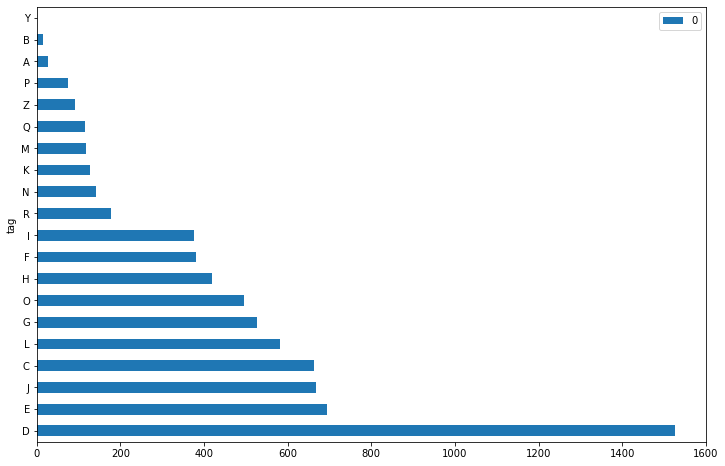

In [37]:
tags_counted_and_sorted.plot.barh(x='tag', y=0, figsize=(12,8))

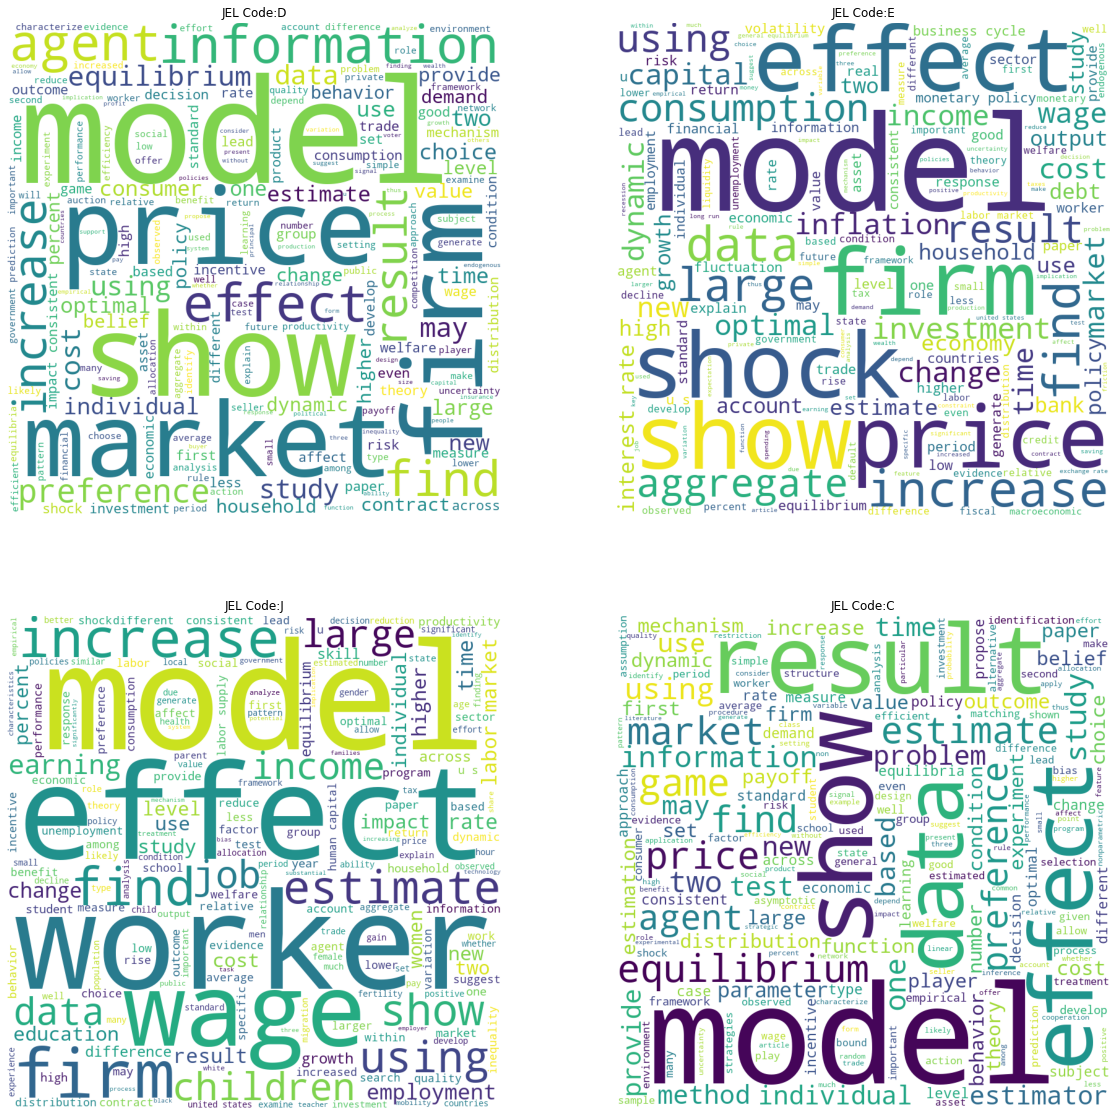

In [64]:
plot_4_wclouds(df, 'D','E','J','C')

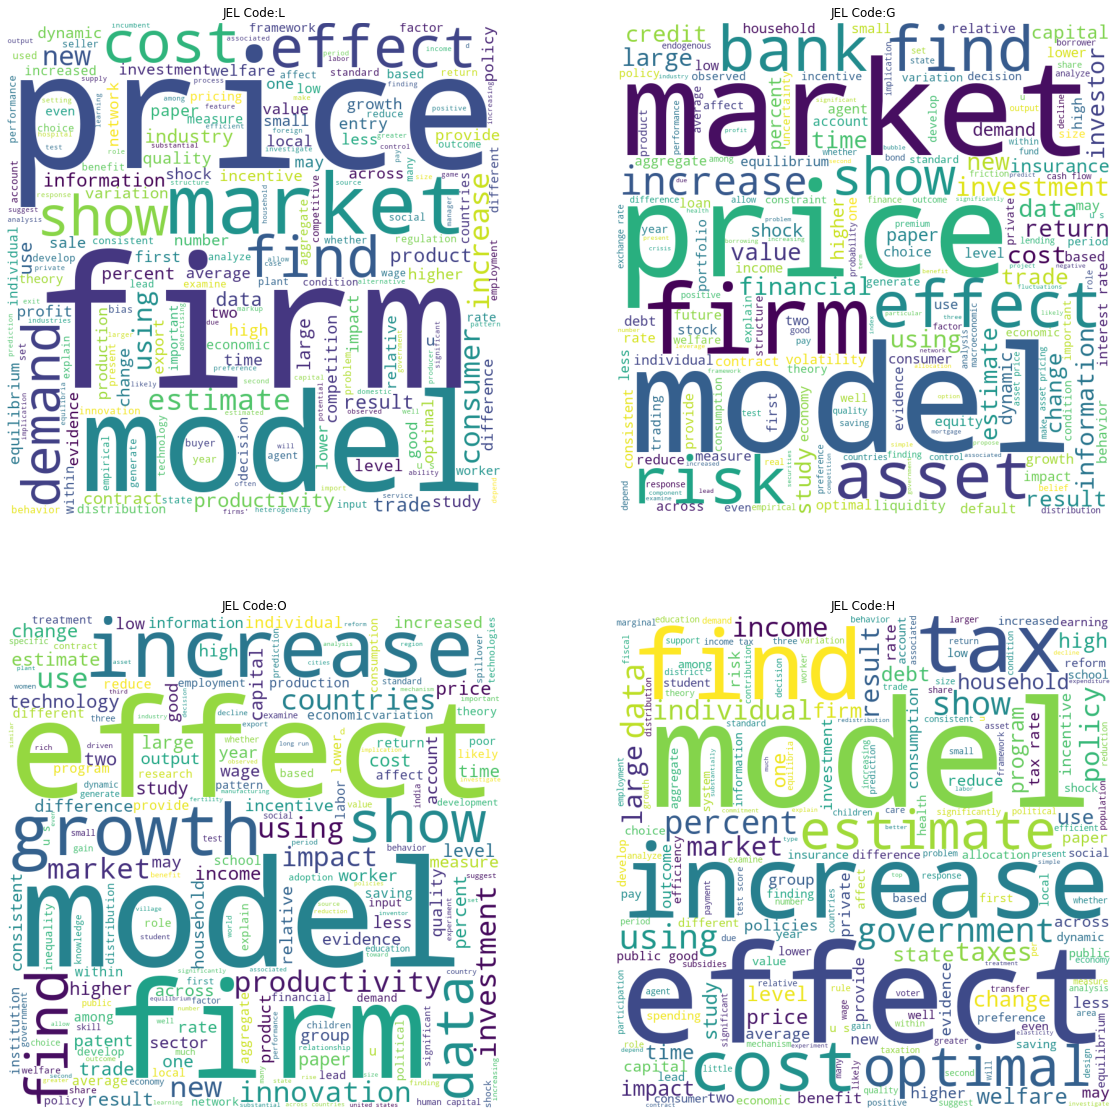

In [65]:
plot_4_wclouds(df, 'L','G','O','H')

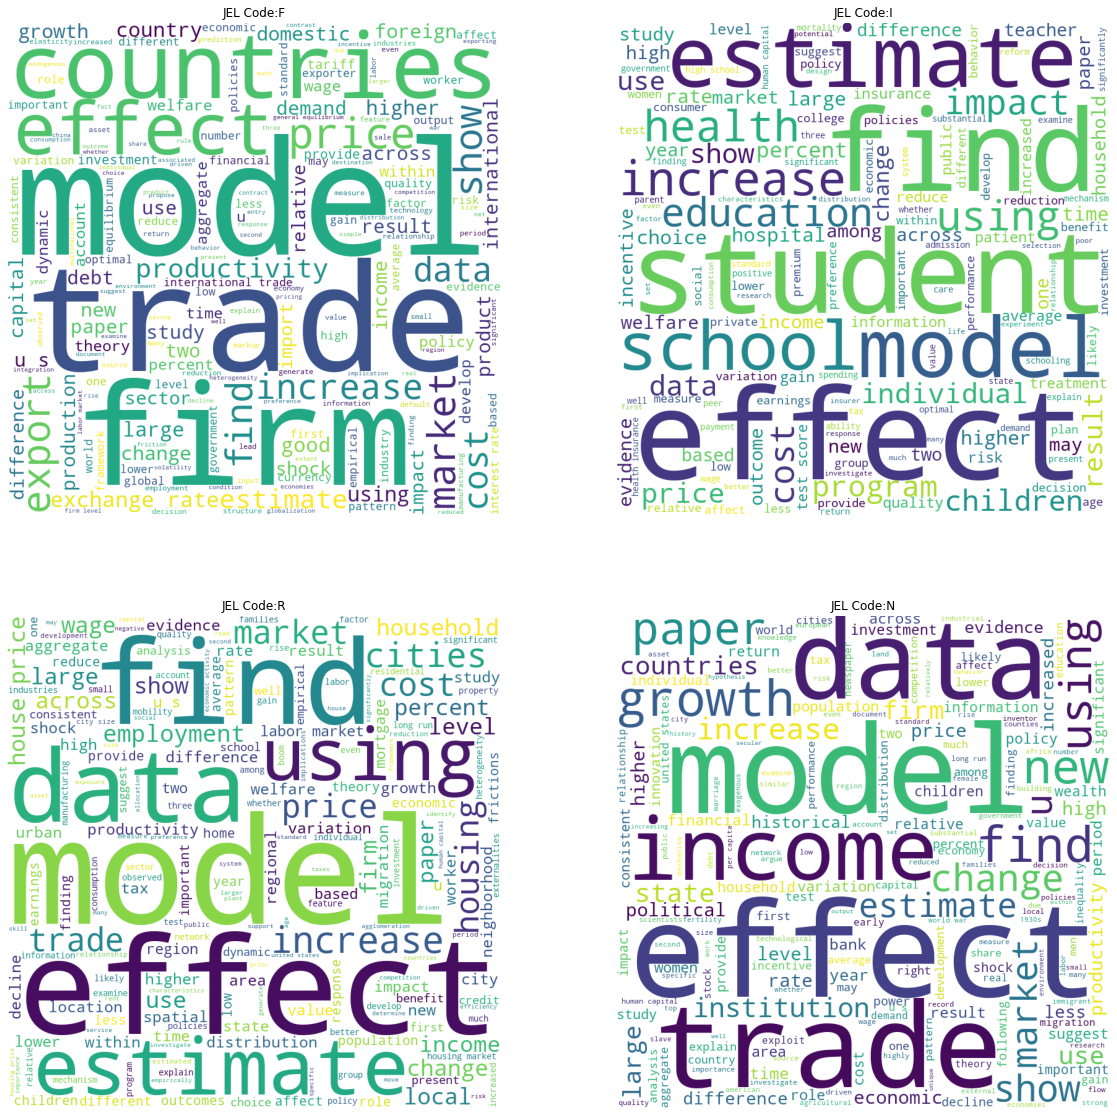

In [66]:
plot_4_wclouds(df, 'F','I','R','N')

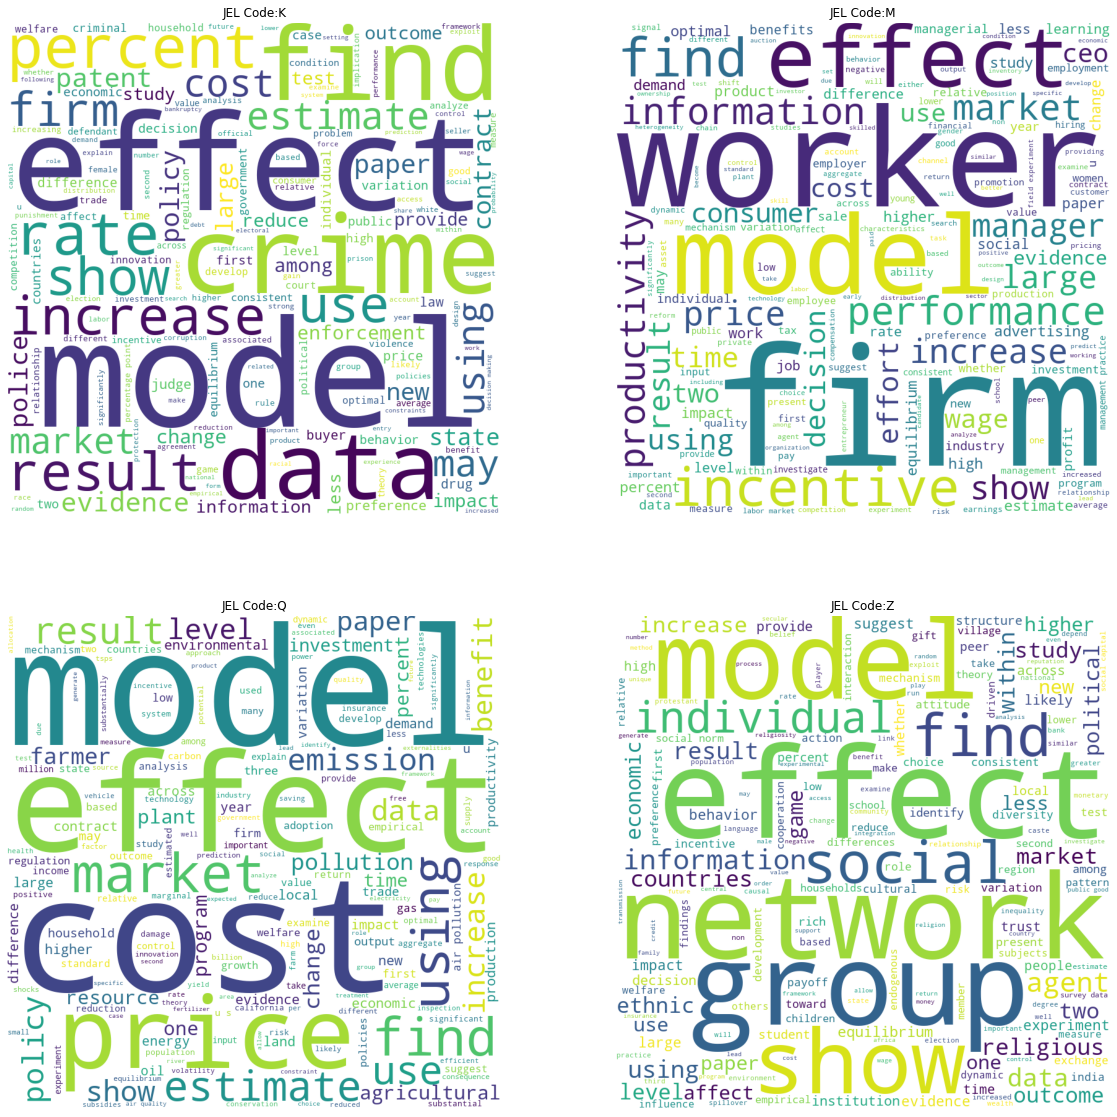

In [67]:
plot_4_wclouds(df,'K','M','Q','Z')

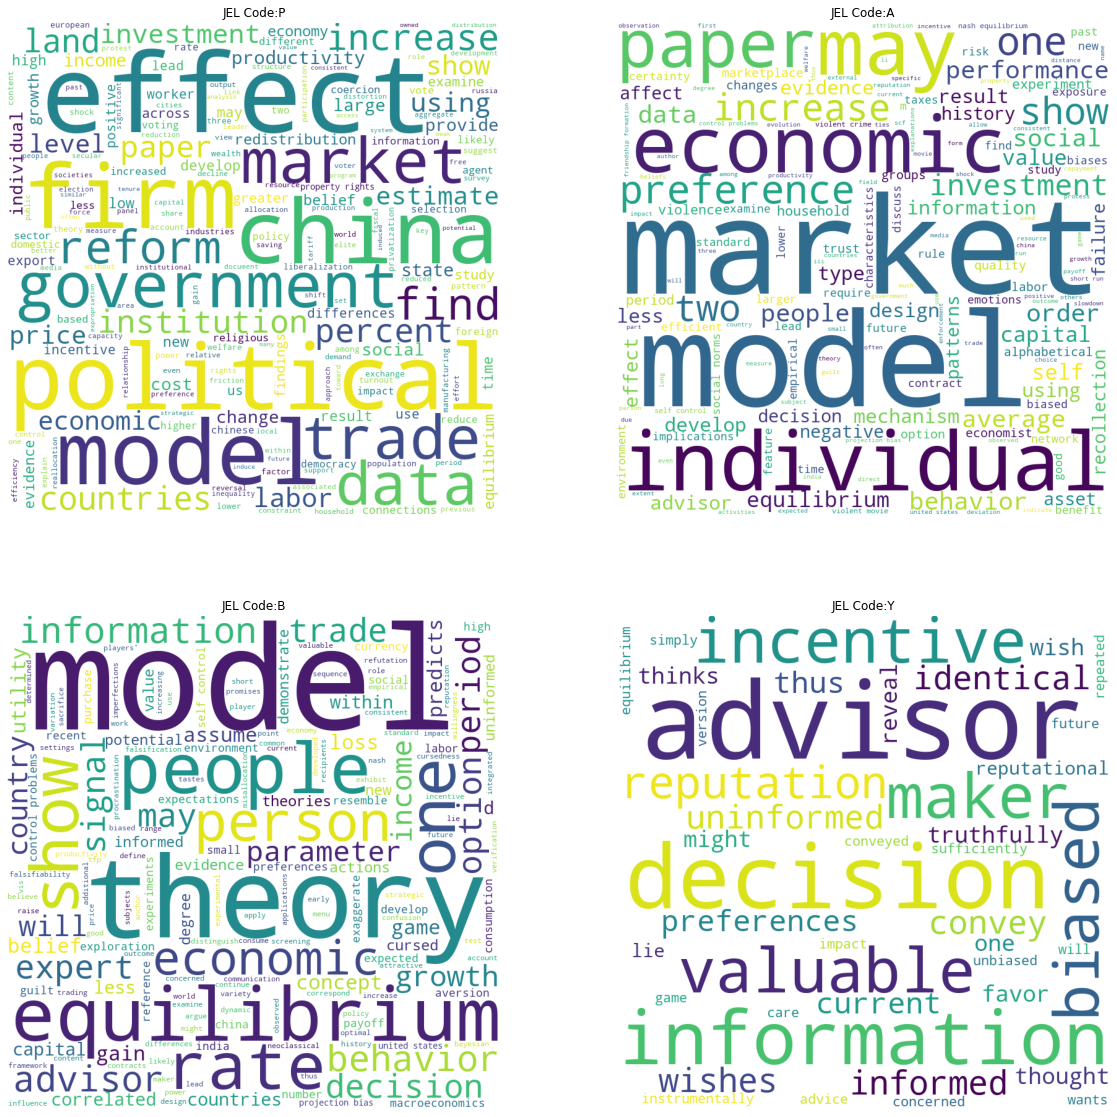

In [68]:
plot_4_wclouds(df,'P','A','B','Y')


In [93]:
JEL = ['D','E','J','C','L','G','O','H','F','I','R','N','K','M','Q','Z','P','A','B','Y']

for code in JEL:
    plot_top_words(df,'abstract', code)
